# 19: LIU Tunespread Mini Scan

## Check bunch length oscillation due to SC reduced voltage

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

### Figure parameters

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['lines.linewidth'] = 1.5

### Function Declarations

In [3]:
def harmonic_fn(x, a, b, c, d):
    return a + b*np.cos(c + 2*np.pi*d*x)

def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

def quadratic(x, a, m, c):
    return a*x**2 + x*m + c

def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)
    
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [4]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

## Import Data

In [36]:
#Horizontal Scan No Space Charge

# Create dd dictionary
dd3 = dict()

dd3 = add_input_file(dd3, 'Run2_Standard/output/output.mat', 'Run2 Std')
dd3 = add_input_file(dd3, 'Run2_BCMS/output/output.mat', 'Run2 BCMS')
dd3 = add_input_file(dd3, 'Run3_Standard_2021/output/output.mat', 'LIU Std 2021')
dd3 = add_input_file(dd3, 'Run3_Standard_2022/output/output.mat', 'LIU Std 2022')
dd3 = add_input_file(dd3, 'Run3_Standard_2023/output/output.mat', 'LIU Std 2023')
dd3 = add_input_file(dd3, 'Run3_BCMS/output/output.mat', 'LIU BCMS')

	Added output data from  Run2_Standard/output/output.mat 	 dictionary key:  Run2 Std
	Added output data from  Run2_BCMS/output/output.mat 	 dictionary key:  Run2 BCMS
	Added output data from  Run3_Standard_2021/output/output.mat 	 dictionary key:  LIU Std 2021
	Added output data from  Run3_Standard_2022/output/output.mat 	 dictionary key:  LIU Std 2022
	Added output data from  Run3_Standard_2023/output/output.mat 	 dictionary key:  LIU Std 2023
	Added output data from  Run3_BCMS/output/output.mat 	 dictionary key:  LIU BCMS


### Plot Parameters

In [37]:
save_folder = 'Plots/'

sc = 'SbS'
legend_label = 'Case' # r'$\frac{\delta p}{p_0}$'
main_label = 'PS_Mini_Bunchlength_Check'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 50
betagamma = 2.492104532 * 0.9159915293879255

In [38]:
dd3['Run2 Std'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'turn_time',
 'n_mp',
 'min_xp',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

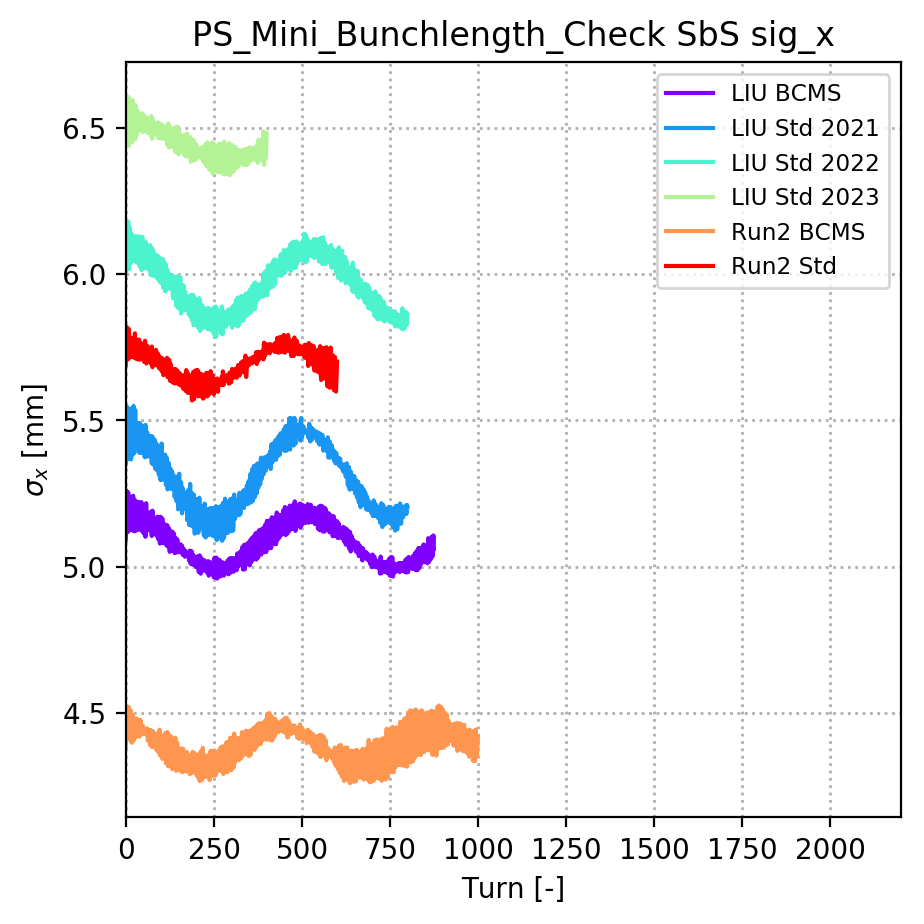

In [39]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

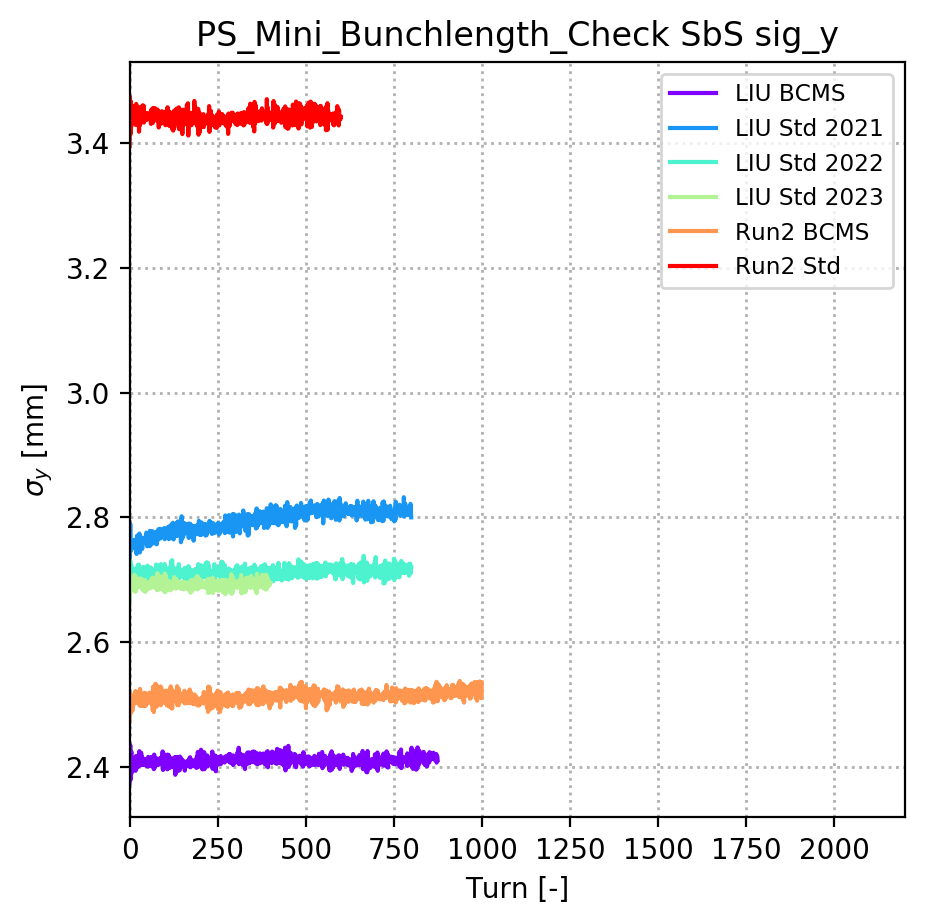

In [40]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1)
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

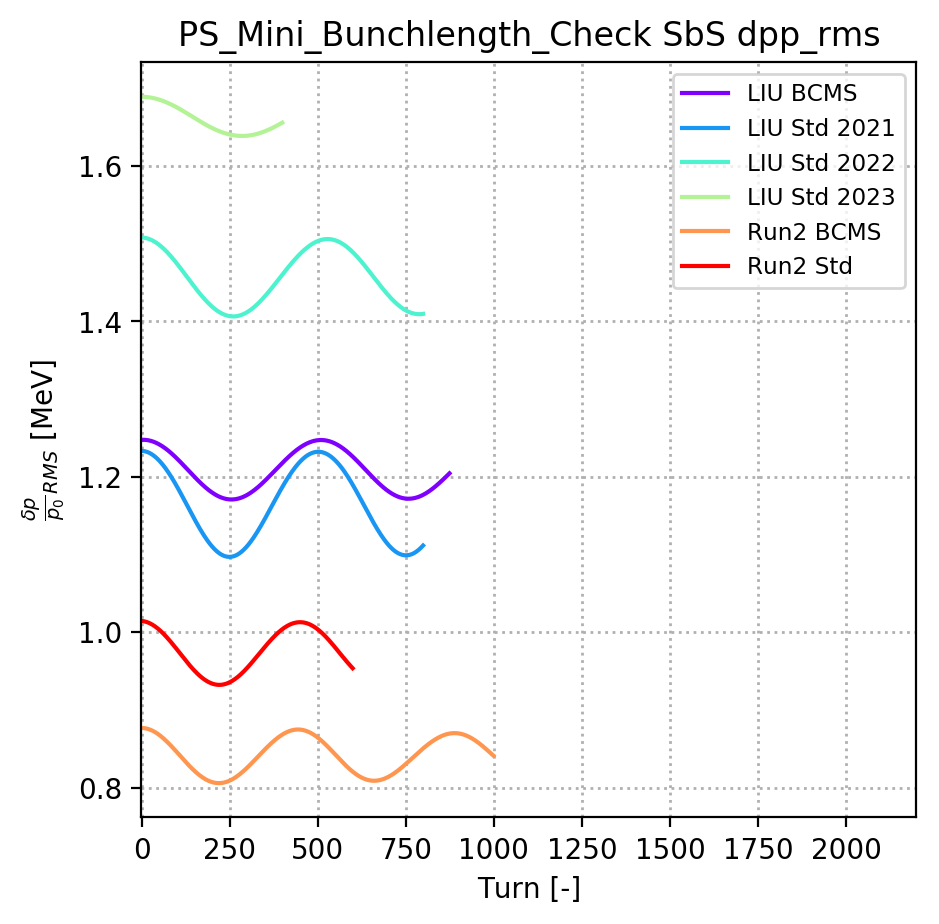

In [41]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p_0}_{RMS}$ [MeV]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1E3, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

LIU BCMS Average  bunchlength  =  128.3  range =  8.019  =  6.249 %
LIU Std 2021 Average  bunchlength  =  134.0  range =  15.11  =  11.28 %
LIU Std 2022 Average  bunchlength  =  159.8  range =  11.16  =  6.986 %
LIU Std 2023 Average  bunchlength  =  188.9  range =  5.808  =  3.074 %
Run2 BCMS Average  bunchlength  =  134.9  range =  11.97  =  8.877 %
Run2 Std Average  bunchlength  =  162.8  range =  14.59  =  8.956 %


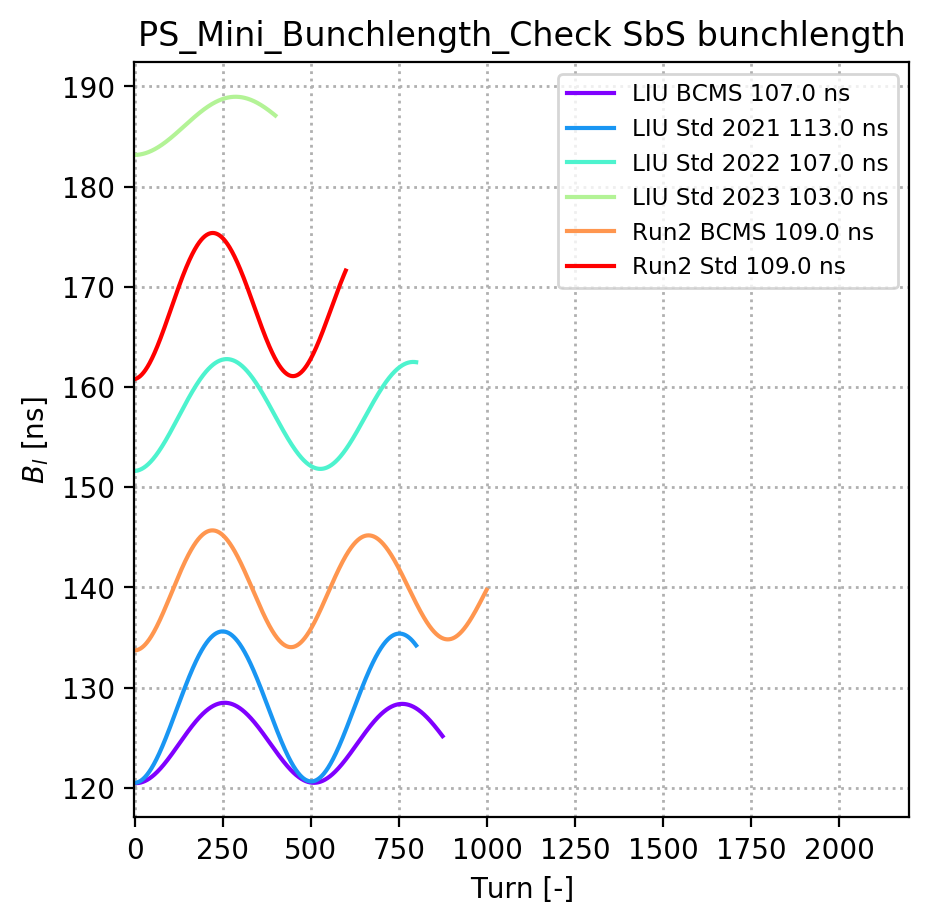

In [42]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):  
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        initial_ = dd3[key][parameter][0][0]*multi1
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'    
        lab_ = key + ' ' + str(100*round_sig(1+(rang_/initial_),3)) + ' ns'           
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

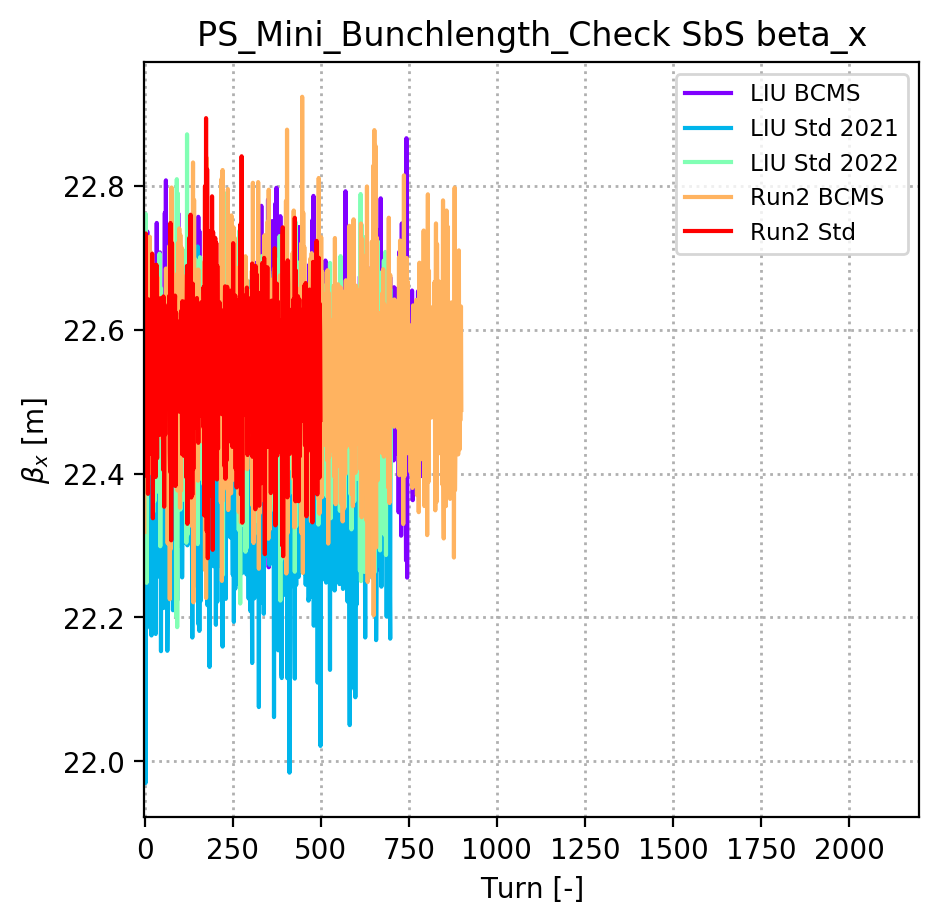

In [14]:
parameter = 'beta_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_{x}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

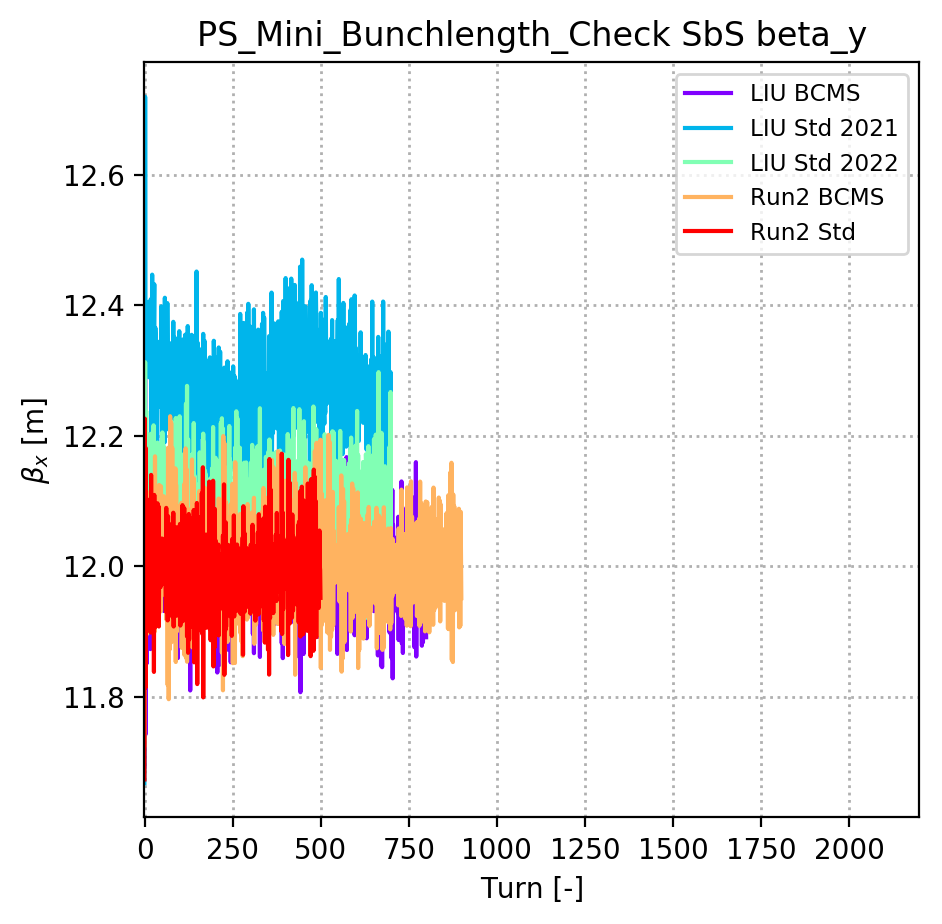

In [15]:
parameter = 'beta_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_{x}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

LIU BCMS Average  epsn_x  =  1433.0  range =  17.7  =  1.236 %
LIU Std 2021 Average  epsn_x  =  1822.0  range =  33.39  =  1.832 %
LIU Std 2022 Average  epsn_x  =  1798.0  range =  13.53  =  0.7521 %
Run2 BCMS Average  epsn_x  =  1202.0  range =  12.67  =  1.054 %
Run2 Std Average  epsn_x  =  2267.0  range =  21.32  =  0.9405 %


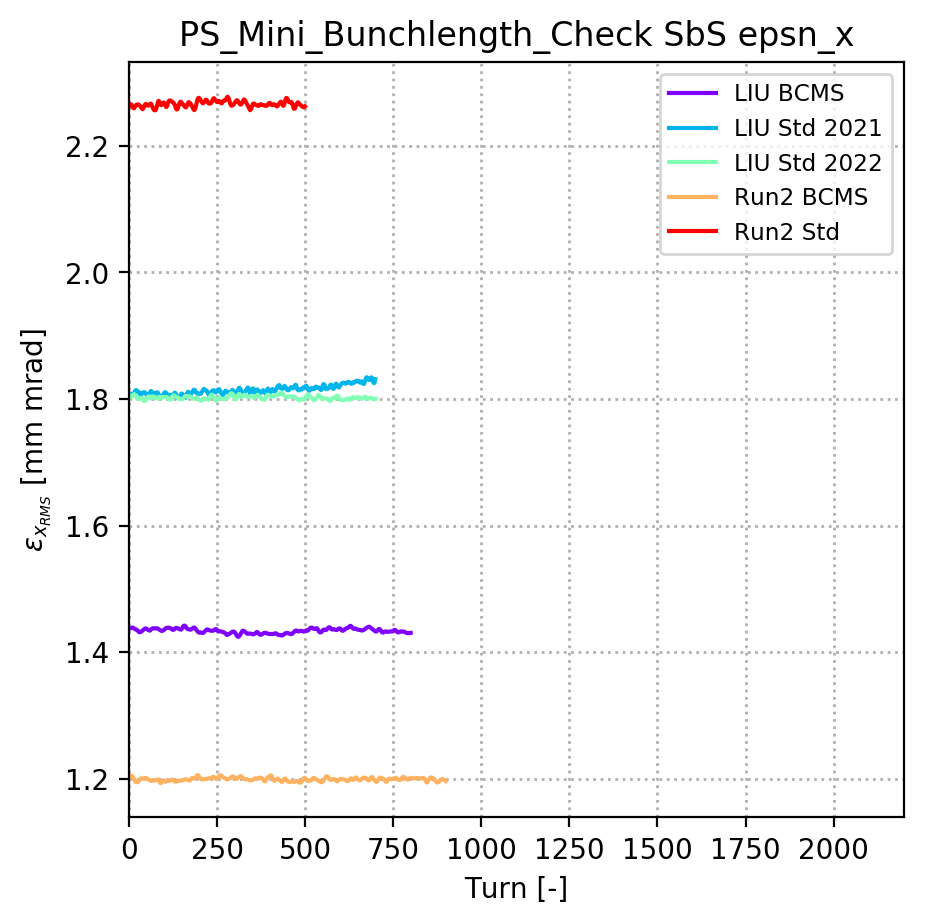

In [16]:
parameter = 'epsn_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_{x_{RMS}}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'    
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

LIU BCMS Average  epsn_y  =  1438.0  range =  18.29  =  1.272 %
LIU Std 2021 Average  epsn_y  =  1914.0  range =  107.4  =  5.611 %
LIU Std 2022 Average  epsn_y  =  1811.0  range =  17.68  =  0.9763 %
Run2 BCMS Average  epsn_y  =  1200.0  range =  20.24  =  1.687 %
Run2 Std Average  epsn_y  =  2253.0  range =  21.22  =  0.9419 %


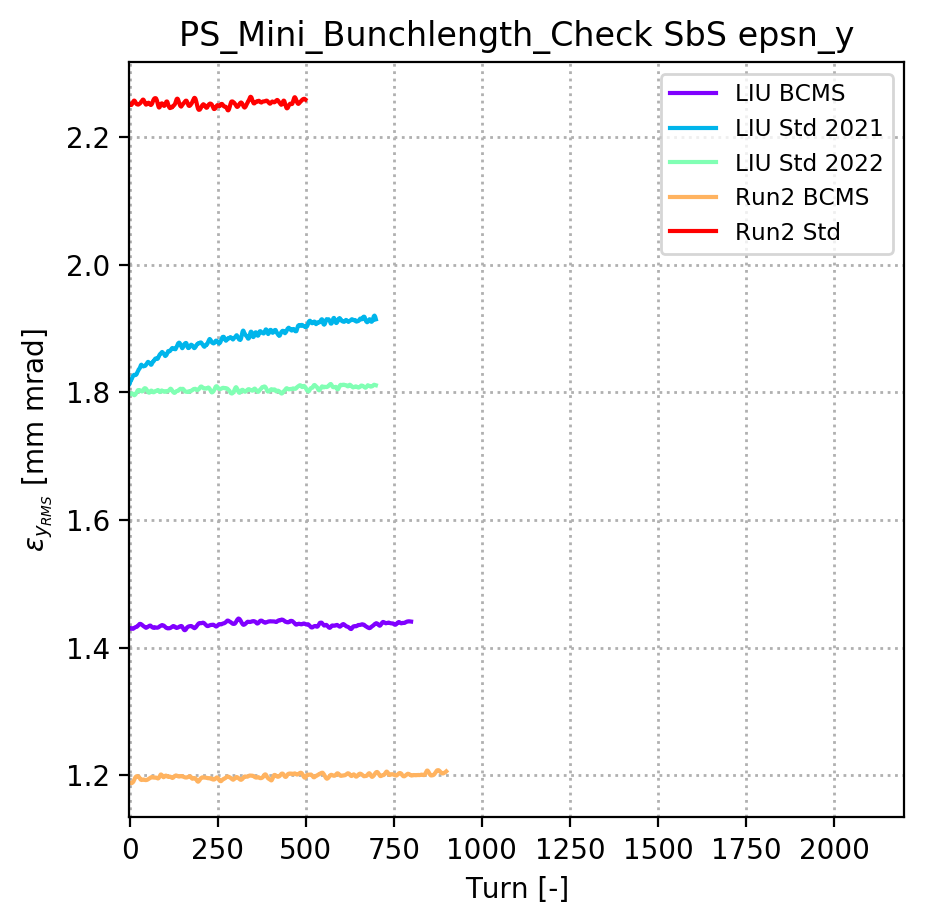

In [17]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_{y_{RMS}}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        av_ = np.mean(dd3[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd3[key][parameter][0]*multi1) - np.min(dd3[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%'    
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

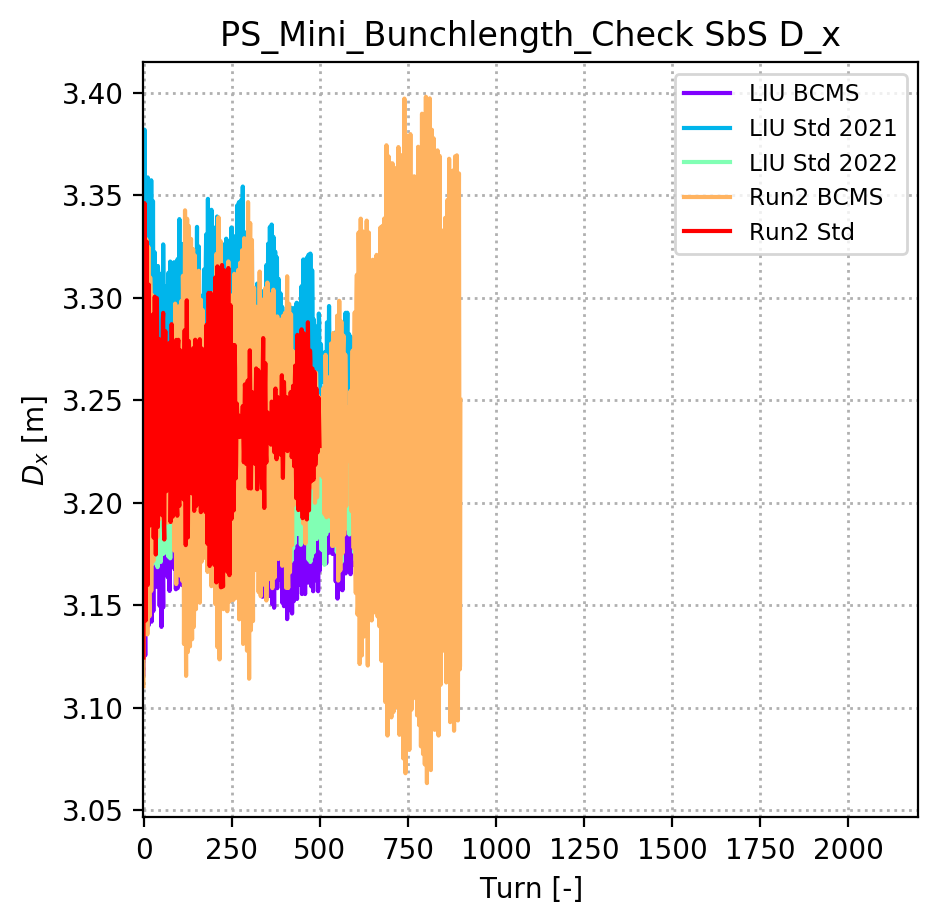

In [18]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_{x}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

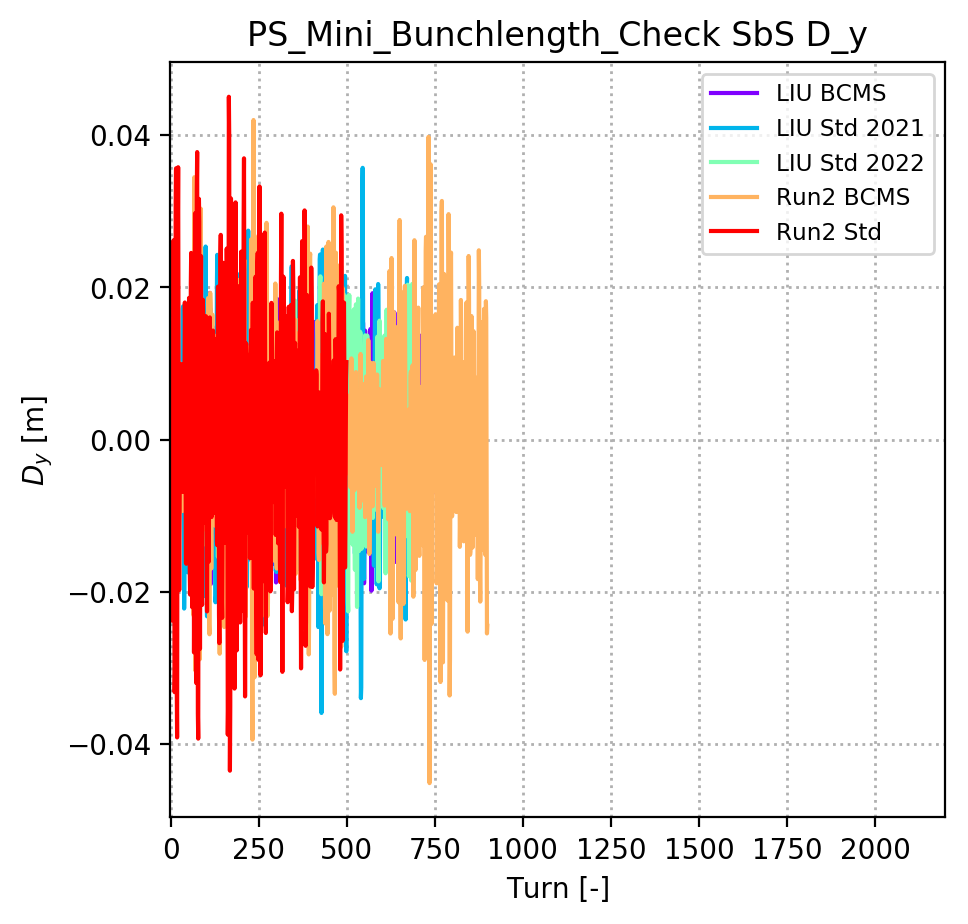

In [19]:
parameter = 'D_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_{y}$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd3.keys())))
c_it = int(0)

for key, value in sorted(dd3.iteritems()):
        ax1.plot(dd3[key]['turn'][0], dd3[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

# Compare individual cases

## Run2 Standard

In [25]:
# Create dd dictionary
dd = dict()

run_lab = 'Run2_Std'

dd = add_input_file(dd, 'Run2_Standard/output/output.mat', 'Run2 Std')
dd = add_input_file(dd, '../02_SC/01_PreLIU_Nominal/output/output.mat', 'Run2 Std Old')

	Added output data from  Run2_Standard/output/output.mat 	 dictionary key:  Run2 Std
	Added output data from  ../02_SC/01_PreLIU_Nominal/output/output.mat 	 dictionary key:  Run2 Std Old


Run2 Std Average  bunchlength  =  162.7  range =  14.59  =  8.962 %
Run2 Std Old Average  bunchlength  =  164.2  range =  9.591  =  5.843 %


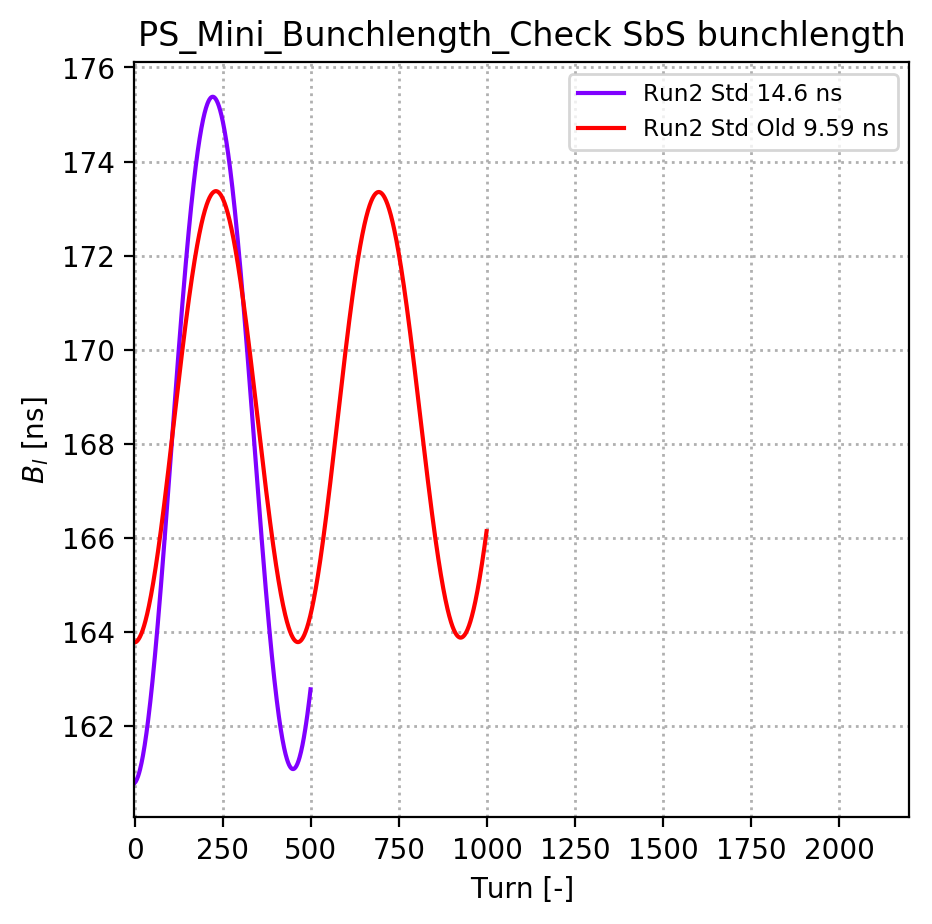

In [26]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        av_ = np.mean(dd[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd[key][parameter][0]*multi1) - np.min(dd[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%' 
        lab_ = key + ' ' + str(round_sig(rang_,3)) + ' ns'
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
   
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ run_lab + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

## Run 2 BCMS

In [27]:
# Create dd dictionary
dd = dict()
run_lab = 'Run2_BCMS'
dd = add_input_file(dd, 'Run2_BCMS/output/output.mat', 'Run2 BCMS')
dd = add_input_file(dd, '../02_SC/02_PreLIU_BCMS/output/output.mat', 'Run2 BCMS Old')

	Added output data from  Run2_BCMS/output/output.mat 	 dictionary key:  Run2 BCMS
	Added output data from  ../02_SC/02_PreLIU_BCMS/output/output.mat 	 dictionary key:  Run2 BCMS Old


Run2 BCMS Average  bunchlength  =  138.4  range =  11.97  =  8.654 %
Run2 BCMS Old Average  bunchlength  =  136.5  range =  6.134  =  4.493 %


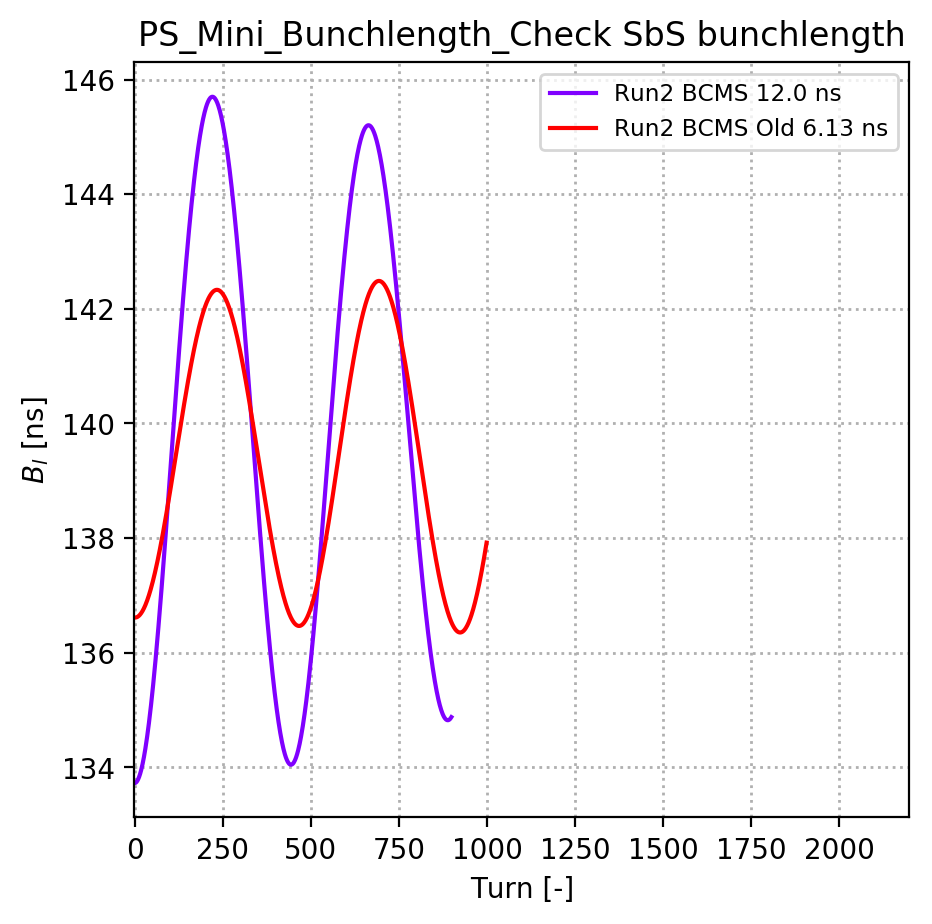

In [28]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        av_ = np.mean(dd[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd[key][parameter][0]*multi1) - np.min(dd[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%' 
        lab_ = key + ' ' + str(round_sig(rang_,3)) + ' ns'
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
   
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ run_lab + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

## Run 3 BCMS

In [29]:
# Create dd dictionary
dd = dict()
run_lab = 'Run3_BCMS'
dd = add_input_file(dd, 'Run3_BCMS/output/output.mat', 'Run3 BCMS')
dd = add_input_file(dd, '../02_SC/04_LIU_BCMS/output/output.mat', 'Run3 BCMS Old')

	Added output data from  Run3_BCMS/output/output.mat 	 dictionary key:  Run3 BCMS
	Added output data from  ../02_SC/04_LIU_BCMS/output/output.mat 	 dictionary key:  Run3 BCMS Old


Run3 BCMS Average  bunchlength  =  127.4  range =  8.019  =  6.295 %
Run3 BCMS Old Average  bunchlength  =  125.1  range =  3.492  =  2.79 %


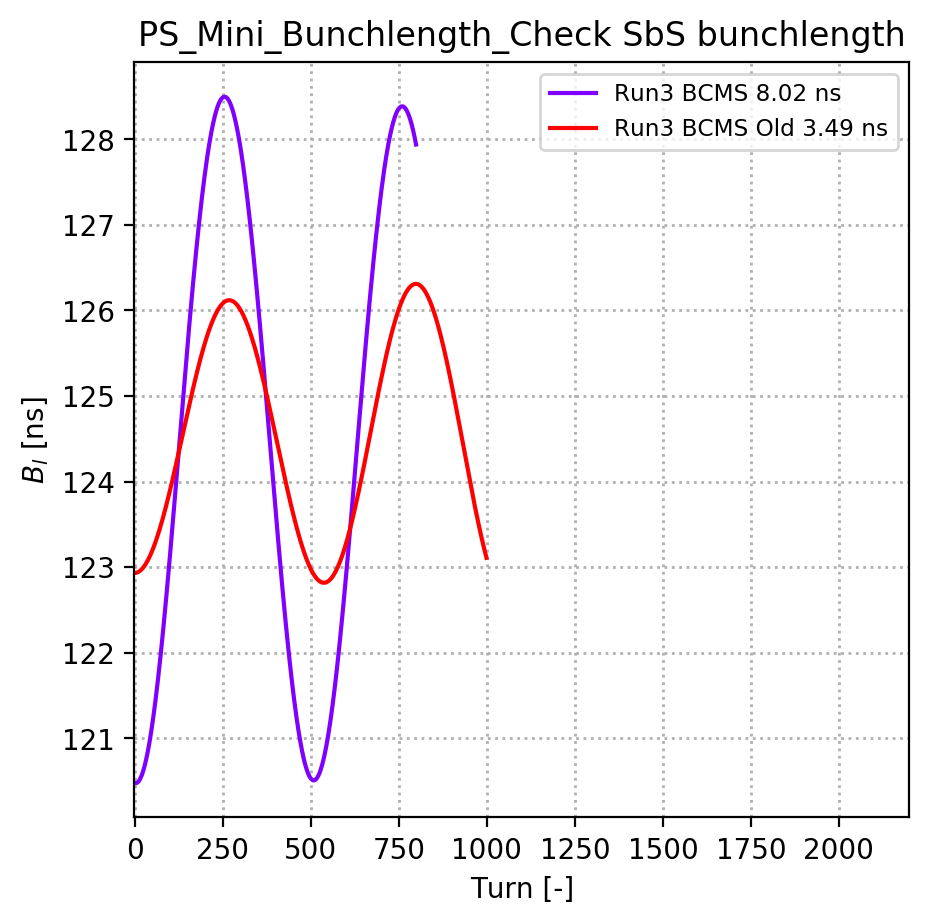

In [30]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        av_ = np.mean(dd[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd[key][parameter][0]*multi1) - np.min(dd[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%' 
        lab_ = key + ' ' + str(round_sig(rang_,3)) + ' ns'
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
   
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ run_lab + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

# Run 3 Std 2021

In [31]:
# Create dd dictionary
dd = dict()
run_lab = 'Run3_Std_2021'
dd = add_input_file(dd, 'Run3_Standard_2021/output/output.mat', 'Run3 Std 2021')
dd = add_input_file(dd, '../04_Ramp_Up_SC/2021/output/output.mat', 'Run3 Std 2021 Old')

	Added output data from  Run3_Standard_2021/output/output.mat 	 dictionary key:  Run3 Std 2021
	Added output data from  ../04_Ramp_Up_SC/2021/output/output.mat 	 dictionary key:  Run3 Std 2021 Old


Run3 Std 2021 Average  bunchlength  =  125.9  range =  15.11  =  12.01 %
Run3 Std 2021 Old Average  bunchlength  =  125.6  range =  13.48  =  10.73 %


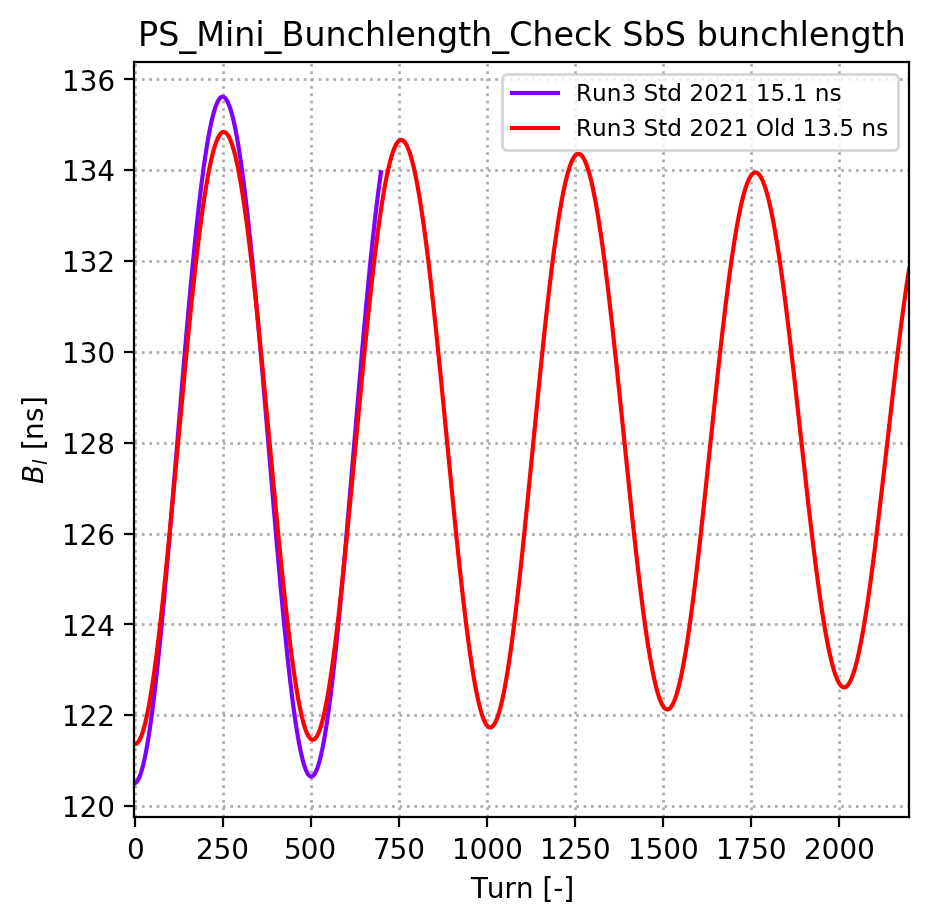

In [32]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        av_ = np.mean(dd[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd[key][parameter][0]*multi1) - np.min(dd[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%' 
        lab_ = key + ' ' + str(round_sig(rang_,3)) + ' ns'
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
   
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ run_lab + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

# Run 3 Std 2022

In [33]:
# Create dd dictionary
dd = dict()
run_lab = 'Run3_Std_2022'
dd = add_input_file(dd, 'Run3_Standard_2022/output/output.mat', 'Run3 Std 2022')
dd = add_input_file(dd, '../04_Ramp_Up_SC/2022/output/output.mat', 'Run3 Std 2022 Old')

	Added output data from  Run3_Standard_2022/output/output.mat 	 dictionary key:  Run3 Std 2022
	Added output data from  ../04_Ramp_Up_SC/2022/output/output.mat 	 dictionary key:  Run3 Std 2022 Old


Run3 Std 2022 Average  bunchlength  =  153.8  range =  11.16  =  7.258 %
Run3 Std 2022 Old Average  bunchlength  =  155.2  range =  5.524  =  3.558 %


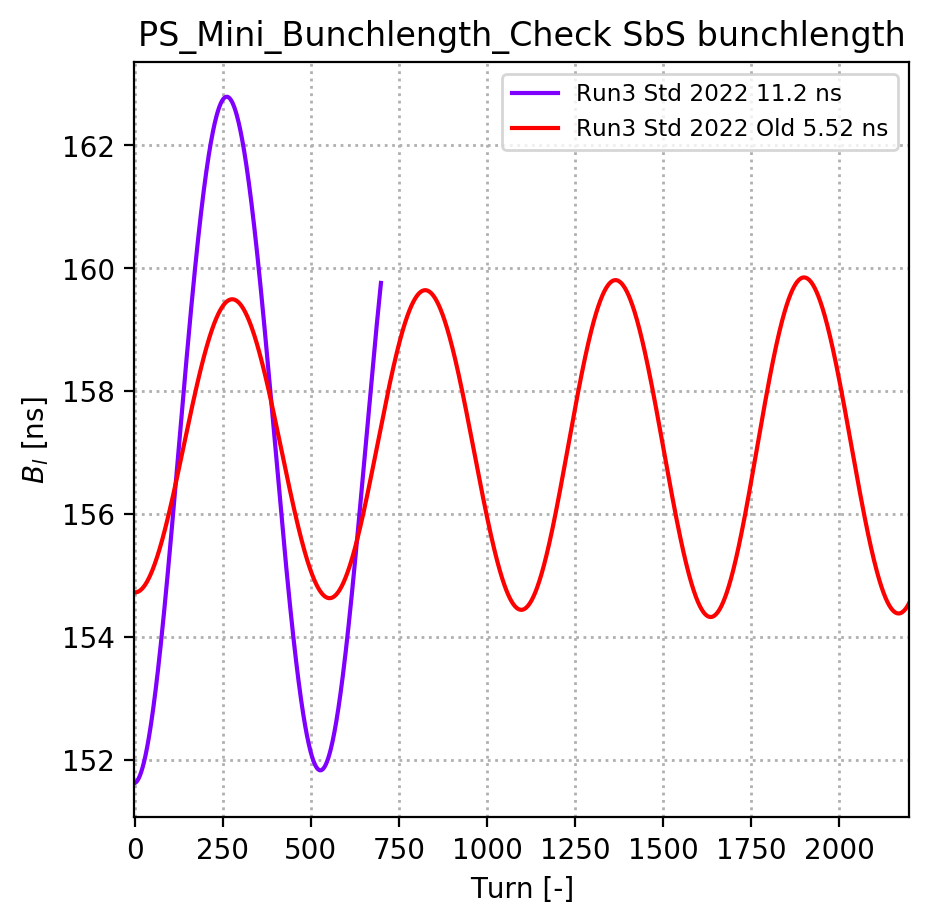

In [34]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        av_ = np.mean(dd[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd[key][parameter][0]*multi1) - np.min(dd[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%' 
        lab_ = key + ' ' + str(round_sig(rang_,3)) + ' ns'
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
   
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ run_lab + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

# Run 3 Std 2023

In [35]:
# Create dd dictionary
dd = dict()
run_lab = 'Run3_Std_2023'
dd = add_input_file(dd, 'Run3_Standard_2023/output/output.mat', 'Run3 Std 2023')
dd = add_input_file(dd, '../04_Ramp_Up_SC/2023/output/output.mat', 'Run3 Std 2023 Old')

TypeError: 'NoneType' object is not iterable

In [ ]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$B_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        av_ = np.mean(dd[key][parameter][0][-100]*multi1)
        rang_ = np.abs(np.max(dd[key][parameter][0]*multi1) - np.min(dd[key][parameter][0]*multi1))
        print key, 'Average ', parameter, ' = ' , \
        str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%' 
        lab_ = key + ' ' + str(round_sig(rang_,3)) + ' ns'
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=lab_, color=colors[c_it]);
   
        c_it = c_it + 1;
        
ax1.legend(loc=1);
ax1.grid(lw=1, ls=':');
ax1.set_xlim(-1,turn_tot)

savename = save_folder + '/'+ run_lab + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);